In [1]:
import os
import cv2
import json
import numpy as np
import matplotlib.pyplot as plt
from pycocotools.coco import COCO

%matplotlib inline

In [14]:
# variables
data_root_dir = 'C:/Users/Thep Ho/Desktop/Thesis/data/'

In [15]:
# make mask from imgs
def make_masks(annotation_file, masks_dir):
	# read annotation file
	coco_label = json.load(open(annotation_file))
	# create coco object
	coco = COCO(annotation_file)
	for i in range(0, len(coco_label['images'])):
		
		# set file name for mask
		img_infor = coco.imgs[i]

		# 18 is the number of noise characters in the file nam in annotation file
		img_file_name = img_infor['file_name'][18:]

		img_ids = coco.getCatIds()
		anns_ids = coco.getAnnIds(imgIds=i, catIds=img_ids, iscrowd=None)

		anns = coco.loadAnns(anns_ids)
		mask = coco.annToMask(anns[0])


		if (len(anns) == 1):	
			mask = coco.annToMask(anns[0])
			plt.imsave(masks_dir + img_file_name, mask)

		
		if (len(anns) == 2):	
			mask = coco.annToMask(anns[1])
			plt.imsave(masks_dir + img_file_name, mask)

In [41]:
root_path = 'C:/Users/Thep Ho/Desktop/Thesis/sub-task/all/'
files_img = os.listdir(root_path + 'images')
files_mask = os.listdir(root_path + 'masks')

files_img = sorted(files_img)
files_mask = sorted(files_mask)

for img in files_img:
    if (img not in files_mask):
        print(img)

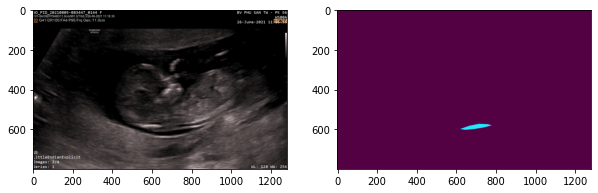

In [39]:
index = 123
img = root_path + 'images/' + files_img[index]
mask = root_path + 'mask/' + files_mask[index]


plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(cv2.imread(img))
plt.subplot(1, 2, 2)
plt.imshow(cv2.imread(mask))

In [9]:
files = os.listdir('C:/Users/Thep Ho/Desktop/Thesis/sub-task/all/mask')

print(len(files))
print(files[5])

737
09062021-083317_20210621145827_2.png


In [33]:
# rename imgs
files_extension = '.png'
def rename_imgs(new_name, path_obj_needs_to_be_renamed):
	files = os.listdir(path_obj_needs_to_be_renamed)
	for i in range(0, len(files)):
		os.rename(path_obj_needs_to_be_renamed + '/' + files[i], path_obj_needs_to_be_renamed + '/' + new_name + str(i + 1) + files_extension)

In [19]:
# check if imgs folder and masks folder has a not same name
def check_all_to_same_name(imgs_file_path, masks_file_path):
	imgs_files = os.listdir(imgs_file_path)
	masks_files = os.listdir(masks_file_path)
	for i in range(0, len(imgs_files)):
		if (imgs_files[i] != masks_files[i]):
			print(imgs_files[i], '!=', masks_files[i], end='\n')
			print('Error: imgs and masks are not the same name')
			break
	return 'True'

In [20]:
imgs_file_path = data_root_dir + 'own-custom-data/imgs'
masks_file_path = data_root_dir + 'own-custom-data/masks'
check_all_to_same_name(imgs_file_path, masks_file_path)

'True'